# Additional Analysis:

In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
from datetime import datetime 
import statistics
import itertools 
from sklearn import preprocessing 
from matplotlib import style

## Question 1:

Text(0, 0.5, 'Count of Patients')

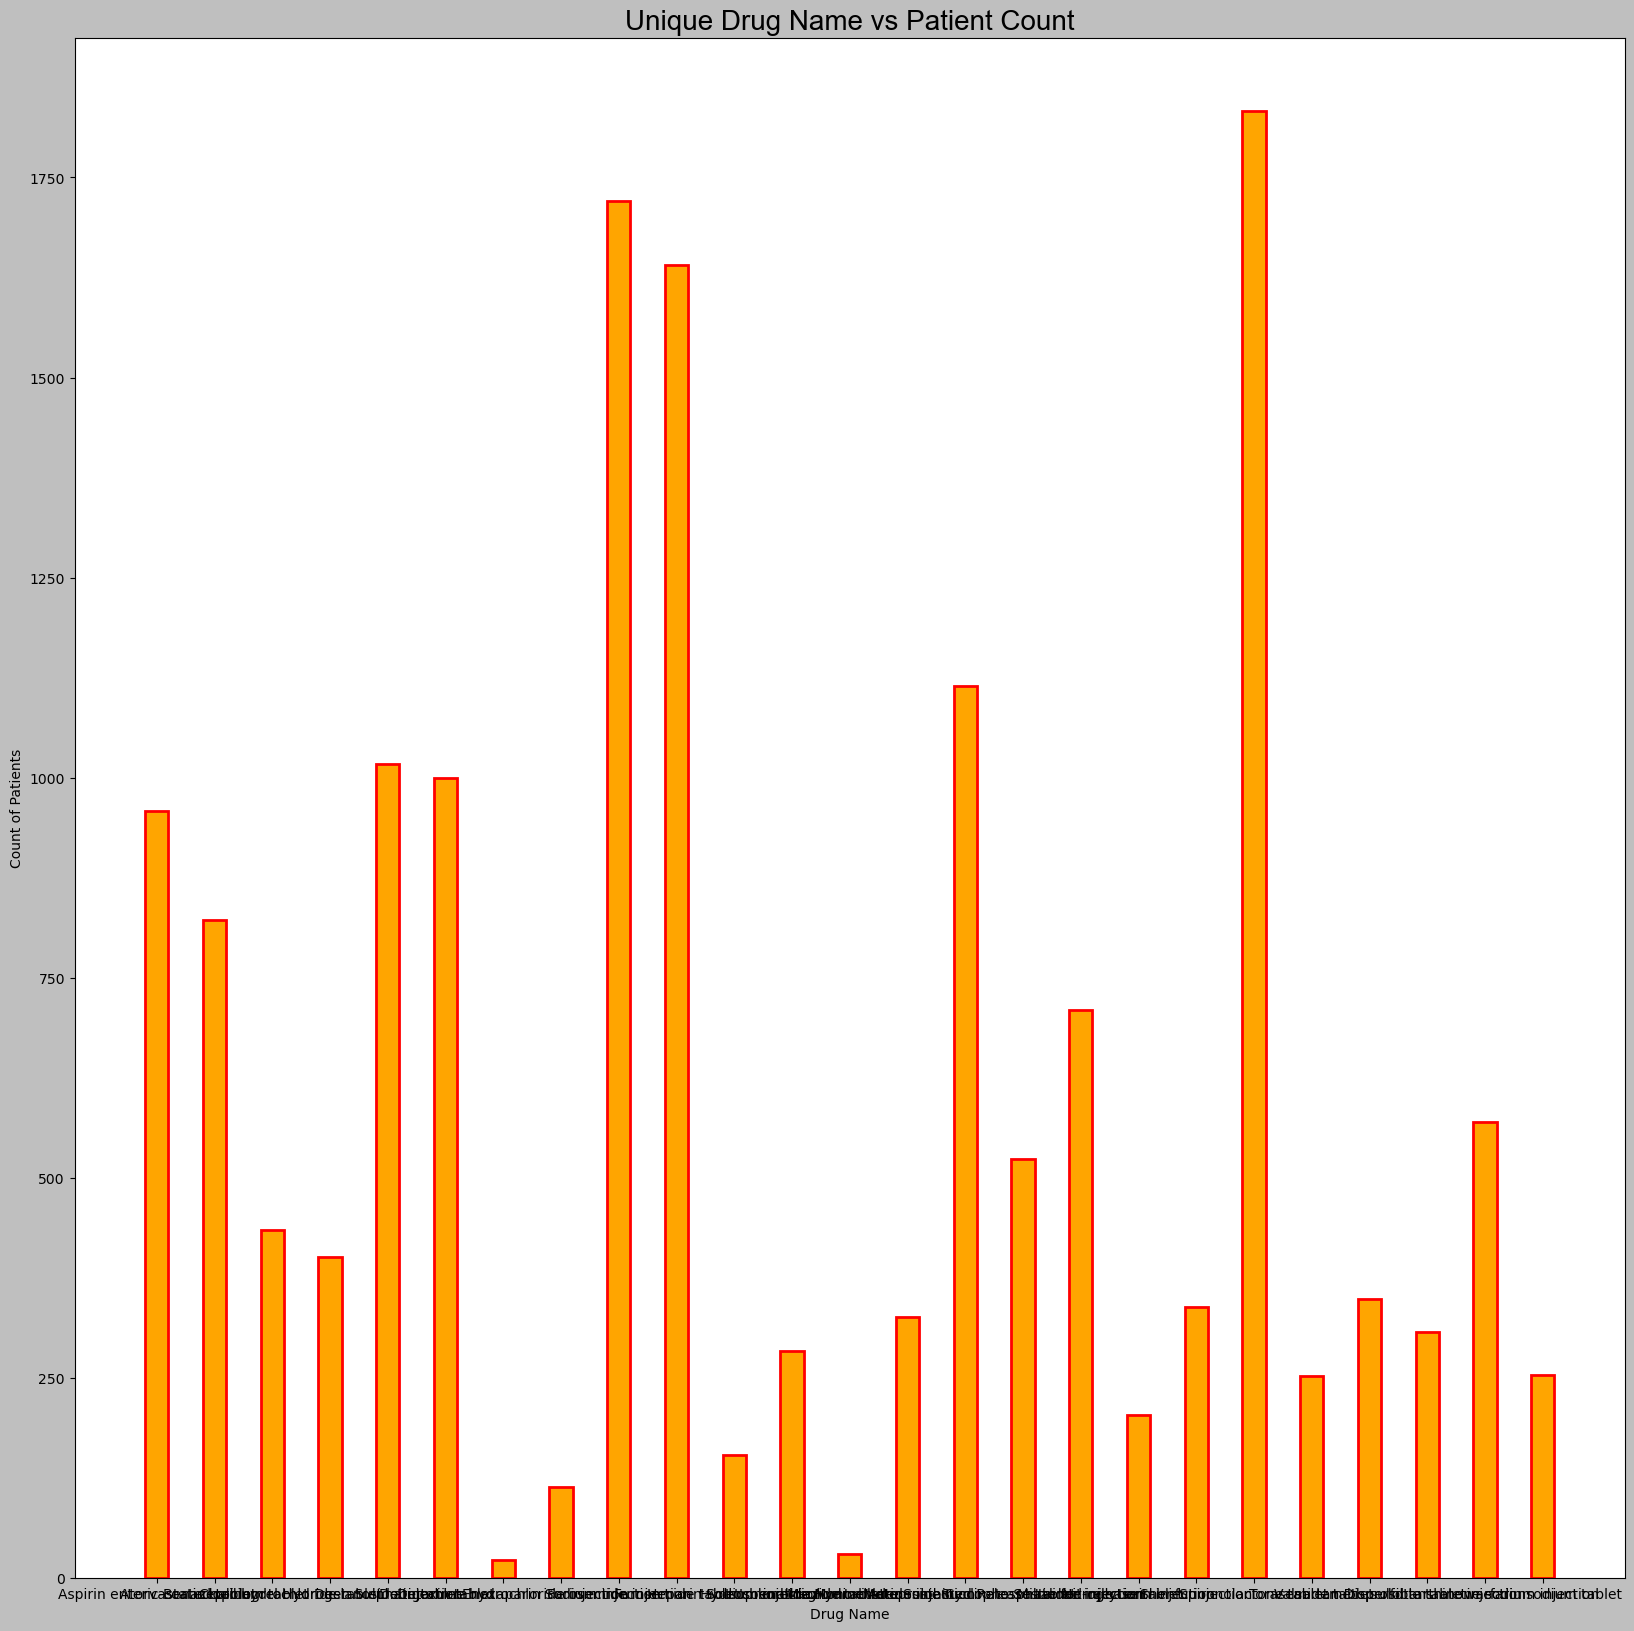

In [16]:
#Bar chart for Count of patient for unique prescribed drugs
df = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Patient_Precriptions')
count=df.groupby(['Drug_name'])['inpatient_number'].count()
a=pd.DataFrame(count).reset_index()
x=np.array(a['Drug_name'])
y=np.array(a['inpatient_number'])
style.use('grayscale')
plt.figure(figsize=(20,20))
plt.bar(x,y,color="orange",align= "center",width=0.4,edgecolor="red",lw=2)
plt.title("Unique Drug Name vs Patient Count",fontsize="20",fontfamily="Arial")
plt.xlabel("Drug Name")
plt.ylabel("Count of Patients")

## Question 2:

In [41]:
#Average BMI based on Gender & Also show the gender of highest average BMI
df1 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Demography')
count=df1.groupby(['gender'])['BMI'].mean()
a=pd.DataFrame(count)
x=a.sort_values(by='gender',ascending=False).reset_index()
y=x.head(1)
print("Gender having the highest average BMI:\n",y.gender)

Gender having the highest average BMI:
 0    Male
Name: gender, dtype: object


## Question 3:

Text(0.5, 1.0, 'Heat Map Based on Pulse')

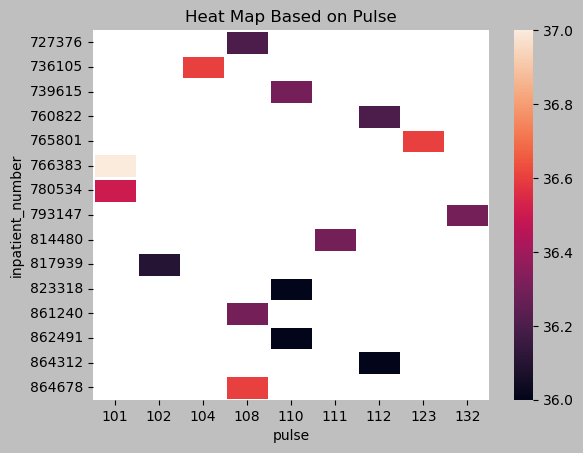

In [49]:
#Heat map for first 15 values of columns patient number,body temparature,pulse for pulse rate greater than 100
df2= pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Labs')
count=df2.loc[(df2['pulse']>=100),['inpatient_number','body_temperature','pulse']]
count=count.head(15)
count=count.pivot_table(index='inpatient_number',columns='pulse',values='body_temperature')
sns.heatmap(count,linewidth=0.8)
plt.title("Heat Map Based on Pulse")

## Question 4:

In [58]:
#Print the details of patients who is normal based on GCS score and also has clear conciousness
df3 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Responsivenes')
count=df3.loc[((df3['GCS']>=15)&(df3['consciousness']=='Clear'))]
print("Details of patient who is out of coma & consciousness is clear:\n",count)

Details of patient who is out of coma & consciousness is clear:
       inpatient_number  eye_opening  verbal_response  movement consciousness  \
0               857781            4                5         6         Clear   
1               743087            4                5         6         Clear   
2               866418            4                5         6         Clear   
3               775928            4                5         6         Clear   
4               810128            4                5         6         Clear   
...                ...          ...              ...       ...           ...   
2002            754589            4                5         6         Clear   
2003            740689            4                5         6         Clear   
2004            734280            4                5         6         Clear   
2005            781004            4                5         6         Clear   
2007            791864            4                5   

## Question 5:

                   index  inpatient_number
0                  Alive              1890
1                   Dead                11
2  DischargeAgainstOrder               107
3             AmbientAir               110
4          OxygenTherapy              1898


Text(0, 0.5, 'Count of Patients')

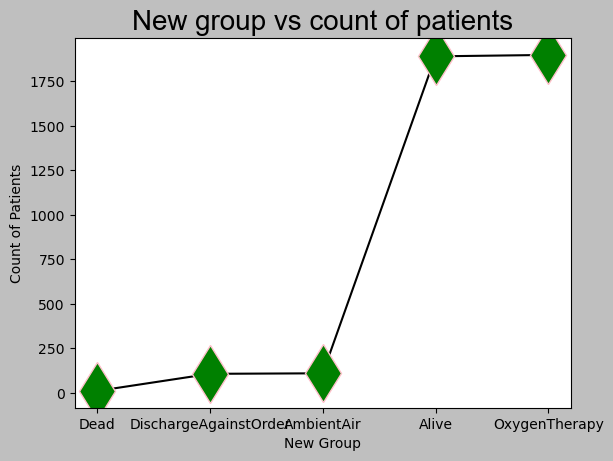

In [64]:
#Combine outcome_during_hospitalization & oxygen_inhalation into one group & find count of patients for the new group.
#plot line chart for that group(Also get the count values sorted)

df4=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge') 
var1=df4.groupby(['outcome_during_hospitalization'])['inpatient_number'].count()
var2=df4.groupby(['oxygen_inhalation'])['inpatient_number'].count()
gk=pd.DataFrame(var1._append(var2)).reset_index()
print(gk)
gk=gk.sort_values(by='inpatient_number')
x = np.array(gk['index'])
y = np.array(a['inpatient_number'])
plt.plot(x,y,marker='d',ms=30,mfc="green",mec='pink')
plt.title("New group vs count of patients",fontsize="20",fontfamily="Arial")
plt.xlabel("New Group")
plt.ylabel("Count of Patients")